In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

df = pd.read_excel (r'data_banjir.xlsx')
df.drop('tanggal', axis=1, inplace=True)
df.drop('ss', axis=1, inplace=True)

labels=df['banjir']
features = df.iloc[:,0:4]

features

,Tavg,RH_avg,RR,ff_avg
0,27.1,88,277.5,1
1,26.8,90,145.3,1
2,26.8,88,128.9,1
3,28.3,84,125.7,3
4,26.7,86,125.2,1
...,...,...,...,...
346,29.6,65,0.0,2
347,28.9,68,0.0,2
348,29.1,70,0.0,3
349,28.3,73,0.0,2


# Bagian Baru

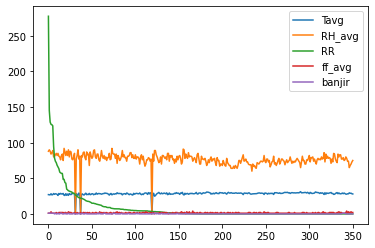

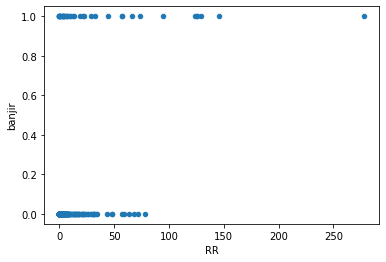

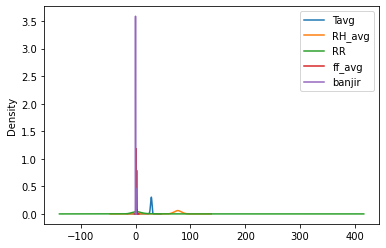

In [ ]:
df.plot() 
df.plot(kind='scatter',x='RR',y='banjir') # scatter plot
df.plot(kind='density')  # estimate density function

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X=features

y=np.ravel(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.head()

,Tavg,RH_avg,RR,ff_avg
333,28.3,84,0.0,2
328,27.4,85,0.0,2
265,28.9,78,0.0,1
163,28.9,81,0.3,1
59,28.4,74,12.5,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
scaled_training = scalar.fit_transform(X_train)
scaled_test = scalar.fit_transform(X_test)

scaled_training_df = pd.DataFrame(data = scaled_training, columns=X_train.columns)
scaled_test_df = pd.DataFrame(data = scaled_test, columns=X_train.columns)

In [ ]:
scaled_training_df.head()

,Tavg,RH_avg,RR,ff_avg
0,0.907051,0.933333,0.000000,0.50
1,0.878205,0.944444,0.000000,0.50
2,0.926282,0.866667,0.000000,0.25
3,0.926282,0.900000,0.001081,0.25
4,0.910256,0.822222,0.045045,0.75


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

array([[-9.20115755e-02,  9.38166982e-01, -3.35471584e-01,
         9.15913668e-01],
       [-5.16912192e-01,  1.06755034e+00, -3.35471584e-01,
         9.15913668e-01],
       [ 1.91255502e-01,  1.61866838e-01, -3.35471584e-01,
        -7.02430031e-01],
       [ 1.91255502e-01,  5.50016910e-01, -3.24174896e-01,
        -7.02430031e-01],
       [-4.48003959e-02, -3.55666590e-01,  1.35223763e-01,
         2.53425737e+00],
       [ 6.63367298e-01, -4.85049948e-01, -2.97815956e-01,
         9.15913668e-01],
       [ 6.63367298e-01, -6.14433305e-01, -3.35471584e-01,
         9.15913668e-01],
       [ 3.80100220e-01, -1.26135009e+00, -1.73552385e-01,
        -7.02430031e-01],
       [ 2.85677861e-01, -7.43816662e-01, -2.97815956e-01,
        -7.02430031e-01],
       [-2.33645114e-01,  6.79400267e-01,  1.81089920e+00,
         9.15913668e-01],
       [ 2.38466682e-01, -2.26283233e-01, -3.35471584e-01,
        -7.02430031e-01],
       [ 4.96219632e-02,  4.20633553e-01,  3.22298524e+00,
      

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(scaled_training_df, y_train,validation_data=(scaled_test_df, y_test),epochs= 50, verbose=1)

Epoch 1/50
8/8 [==============================] - 11s 71ms/step - loss: 0.7383 - accuracy: 0.1576 - val_loss: 0.7131 - val_accuracy: 0.4914
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 0.7264 - accuracy: 0.2678 - val_loss: 0.7028 - val_accuracy: 0.4914
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7144 - accuracy: 0.4279 - val_loss: 0.6930 - val_accuracy: 0.4914
Epoch 4/50
8/8 [==============================] - 0s 8ms/step - loss: 0.7000 - accuracy: 0.4563 - val_loss: 0.6835 - val_accuracy: 0.5603
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.4609 - val_loss: 0.6742 - val_accuracy: 0.7672
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.5510 - val_loss: 0.6654 - val_accuracy: 0.8966
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.7082 - val_loss: 0.6566 - val_accuracy: 0.8879
Epoch 8/50
8/8 [================

In [ ]:
# evaluate the model
_, train_acc = model.evaluate(scaled_training_df, y_train, verbose=0)
_, test_acc = model.evaluate(scaled_test_df, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Train: 0.881, Test: 0.897


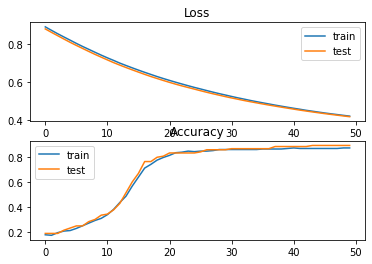

In [ ]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

In [ ]:
model.save("banjir_model.h5")

In [ ]:
inputs = np.array([[28.6, 80, 90.5, 1]], dtype=np.float32)
predics = model.predict(inputs)
predics

array([[0.4236281]], dtype=float32)

In [ ]:
model.save_weights('my_model_weights.h5')

In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
LR.predict(X_test)
print(round(LR.score(X_test,y_test), 4))

SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
print(round(SVM.score(X_test, y_test), 4))

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
print(round(RF.score(X_test, y_test), 4))

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_train, y_train)
NN.predict(X_test)
print(round(NN.score(X_test, y_test), 4))

0.8879
0.8879
0.8621
0.8362


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Make predictions on validation dataset
inputs = np.array([[27.1, 200, 90.5, 1]], dtype=np.float32)
# predictions = model.predict(inputs)
# predictions

tes = tf.keras.models.load_model('sentiment.h5')
predictions = tes.predict(inputs)
predictions

# Evaluate predictions
# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))

array([[1.]], dtype=float32)

In [ ]:
# Example of generating samples from the two circle problem
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset

X=features

y=np.ravel(labels)
# scatter plot, dots colored by class value
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

TypeError: ignored

In [ ]:
#dibawah percobaan menggunakan SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print("Before OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res == 0)))

Before OverSampling, counts of label '1': 28
Before OverSampling, counts of label '0': 207 

Before OverSampling, counts of label '1': 12
Before OverSampling, counts of label '0': 104 

After OverSampling, the shape of train_X: (414, 4)
After OverSampling, the shape of train_y: (414,) 

After OverSampling, counts of label '1': 207
After OverSampling, counts of label '0': 207
After OverSampling, the shape of test_X: (208, 4)
After OverSampling, the shape of test_y: (208,) 

After OverSampling, counts of label '1': 104
After OverSampling, counts of label '0': 104


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train_res, y_train_res,validation_data=(X_test_res, y_test_res),epochs= 300, verbose=1)

Epoch 1/300
13/13 [==============================] - 1s 20ms/step - loss: 0.6634 - accuracy: 0.6092 - val_loss: 0.6984 - val_accuracy: 0.4952
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6524 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6492 - val_loss: 0.6797 - val_accuracy: 0.5192
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6306 - accuracy: 0.6937 - val_loss: 0.6710 - val_accuracy: 0.5481
Epoch 5/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.7248 - val_loss: 0.6622 - val_accuracy: 0.6058
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7993 - val_loss: 0.6553 - val_accuracy: 0.6346
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7747 - val_loss: 0.6482 - val_accuracy: 0.6635
Epoch 8/300


In [ ]:
# evaluate the model
_, train_acc = model.evaluate(X_train_res, y_train_res, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.802, Test: 0.750


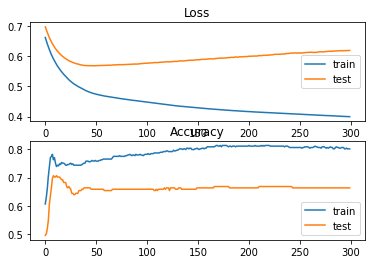

In [ ]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()